<a href="https://colab.research.google.com/github/chimdessa-tesfe/week-one/blob/main/telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import io

Import The csv file to **colab**

In [ ]:
from google.colab import files 
uploaded = files.upload()

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Week1_challenge_data_source.csv']))
print(df)

           Bearer Id            Start  ...  Total UL (Bytes) Total DL (Bytes)
0       1.310000e+19   4/4/2019 12:01  ...        36749741.0      308879636.0
1       1.310000e+19   4/9/2019 13:04  ...        53800391.0      653384965.0
2       1.310000e+19   4/9/2019 17:42  ...        27883638.0      279807335.0
3       1.310000e+19   4/10/2019 0:31  ...        43324218.0      846028530.0
4       1.310000e+19  4/12/2019 20:10  ...        38542814.0      569138589.0
...              ...              ...  ...               ...              ...
149996  7.280000e+18   4/29/2019 7:28  ...        57628851.0      574175259.0
149997  7.350000e+18   4/29/2019 7:28  ...        39135081.0      666648844.0
149998  1.310000e+19   4/29/2019 7:28  ...        34912224.0      592786405.0
149999  1.310000e+19   4/29/2019 7:28  ...        29626096.0      371895920.0
150000           NaN              NaN  ...               NaN              NaN

[150001 rows x 55 columns]


**Before preprocessing we have to explore what is in the data.The column names, how many data points, number of colum etc. All these questions needs to be answered**

In [ ]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [ ]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


**Handling Missing values**
Missing values are misslead our conclusion so we have to omit the datas(rows and columns with much missing values).


In [ ]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The Telecom dataset contains 12.5 % missing values.


In [ ]:
# Now which column(s) has missing values
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

**Drop columns with many missing values >30%**
ex.

1.   Nb of sec with 6250B < Vol DL < 31250B
2.   Nb of sec with 6250B < Vol UL < 37500B etc...



In [ ]:
df_clean = df.drop(['Avg RTT UL (ms)', 'Avg RTT DL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'], axis=1)

In [ ]:
df_clean.shape

(150001, 44)

From 55 column own to 44 we drop 11 columns with much null values.
There is one big question raised that is why choose dropping rather than filling? my answer is the columns are not much worthy in doing my analysis based on the given topic.and null values above 30%.


In [ ]:
#We will also remove data points without customer numbers(MSISDN/Number).This is because these kind of datas usually provide insights of little value.
db = df_clean[df_clean['MSISDN/Number'].notna()]
print(db)

           Bearer Id            Start  ...  Total UL (Bytes) Total DL (Bytes)
0       1.310000e+19   4/4/2019 12:01  ...        36749741.0      308879636.0
1       1.310000e+19   4/9/2019 13:04  ...        53800391.0      653384965.0
2       1.310000e+19   4/9/2019 17:42  ...        27883638.0      279807335.0
3       1.310000e+19   4/10/2019 0:31  ...        43324218.0      846028530.0
4       1.310000e+19  4/12/2019 20:10  ...        38542814.0      569138589.0
...              ...              ...  ...               ...              ...
149995  1.300000e+19   4/29/2019 7:28  ...        53745392.0      819016468.0
149996  7.280000e+18   4/29/2019 7:28  ...        57628851.0      574175259.0
149997  7.350000e+18   4/29/2019 7:28  ...        39135081.0      666648844.0
149998  1.310000e+19   4/29/2019 7:28  ...        34912224.0      592786405.0
149999  1.310000e+19   4/29/2019 7:28  ...        29626096.0      371895920.0

[148935 rows x 44 columns]



# Task 1

# User Overview analysis


*   Start by identifying the top 10 handsets used by the customers.
*   Then, identify the top 3 handset manufacturers
*   Next, identify the top 5 handsets per top 3 handset manufacturer List item
*   Make a short interpretation and recommendation to marketing teams



In [ ]:
#Top-ten hansets used by customers.
handsets=db['Handset Type']
handsets=handsets[handsets!='undefined']
handsets.value_counts().nlargest(10)

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Samsung Galaxy A5 Sm-A520F       3708
Name: Handset Type, dtype: int64

In [ ]:
#Top-three hansets manufacturers
handsetmanufacturer=db['Handset Manufacturer']
handsetmanufacturer=handsetmanufacturer[handsetmanufacturer!='undefined']
df_man=handsetmanufacturer.value_counts().nlargest(3)
df_man

Apple      59464
Samsung    40579
Huawei     34366
Name: Handset Manufacturer, dtype: int64

In [ ]:
#top 5 handsets per top 3 handset manufacturer(by Apple handset Manufacturer)
by_manufacturer = db.groupby(['Handset Manufacturer'])

by_manufacturer.get_group('Apple')['Handset Type'].value_counts().nlargest(5) 

Apple iPhone 6S (A1688)    9413
Apple iPhone 6 (A1586)     9012
Apple iPhone 7 (A1778)     6304
Apple iPhone Se (A1723)    5176
Apple iPhone 8 (A1905)     4985
Name: Handset Type, dtype: int64

In [ ]:
#top 5 handsets per top 3 handset manufacturer(by Samsung handset Manufacturer)
by_manufacturer.get_group('Samsung')['Handset Type'].value_counts().nlargest(5)

Samsung Galaxy S8 (Sm-G950F)    4480
Samsung Galaxy A5 Sm-A520F      3708
Samsung Galaxy J5 (Sm-J530)     3682
Samsung Galaxy J3 (Sm-J330)     3464
Samsung Galaxy S7 (Sm-G930X)    3176
Name: Handset Type, dtype: int64

In [ ]:
#top 5 handsets per top 3 handset manufacturer(by Huawei handset Manufacturer)
by_manufacturer.get_group('Huawei')['Handset Type'].value_counts().nlargest(5)

Huawei B528S-23A                  19727
Huawei E5180                       2074
Huawei P20 Lite Huawei Nova 3E     2018
Huawei P20                         1479
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

***interpretation and recommendation to marketing teams***

=most customers are using the Apple,samsung,huawei products respectively.

=The Huawei product Huawei B528S-23A is the widely used Handset Type by customers.

# Task **1.1**

user behavior can be tracked through the following applications: Social Media, Google,
Email, Youtube, Netflix, Gaming, Other .

In this part of the code we will make the data points drawn from the file formatted in way that enables analysis.This includes

-Combining related data like adding Upload and Download bytes for each
Application.

-Cleaning data of outliers as done by the function clean()(also removing NaN values)

-Collecting the cleaned data into a Dataframe(I have named it ***regression*** because it will be fitting later)

In [ ]:
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
regre=db[['Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
         'Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)',
          'Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)']]

regre['Social']=regre['Social Media DL (Bytes)'] + regre['Social Media UL (Bytes)']
regre['Google']=regre['Google DL (Bytes)'] + regre['Google UL (Bytes)']
regre['Email']=regre['Email DL (Bytes)'] + regre['Email UL (Bytes)']
regre['Youtube']=regre['Youtube DL (Bytes)'] + regre['Youtube UL (Bytes)']
regre['Netflix']=regre['Netflix DL (Bytes)'] + regre['Netflix UL (Bytes)']
regre['Gaming']=regre['Gaming DL (Bytes)'] + regre['Gaming UL (Bytes)']
regre['Other']=regre['Other DL (Bytes)'] + regre['Other UL (Bytes)']
regre['Total']=regre['Total UL (Bytes)'] + regre['Total DL (Bytes)']
temp =db[['MSISDN/Number']]
task_1_1  = pd.concat([db[['MSISDN/Number']], regre['Social'],regre['Google'],regre['Email'],regre['Youtube'],
                       regre['Netflix'],regre['Gaming'],regre['Other'],regre['Total']], axis=1)

def clean(x1):
   
    x1 = x1[x1.between(x1.quantile(.15), x1.quantile(.75))] 
    
    x1.fillna(x1.mean())
   
    y1=pd.DataFrame(x1)
    y1.reset_index(drop=True, inplace=True)
   
    return y1



social=clean(regre['Social'])
Google=clean(regre['Google'])
Email=clean(regre['Email'])
Youtube=clean(regre['Youtube'])
Netflix=clean(regre['Netflix'])
Gaming=clean(regre['Gaming'])
Other=clean(regre['Other'])
Total=clean(regre['Total'])




regression =pd.concat([social,Google,Youtube,Netflix,Gaming,Other,Total],axis=1)

regression


,Social,Google,Youtube,Netflix,Gaming,Other,Total
0,1570185.0,4414096.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1933278.0,10229119.0,23944031.0,23751202.0,609920783.0,541959383.0,307690973.0
2,1726277.0,7748843.0,22911539.0,15092588.0,229980251.0,414908351.0,607681403.0
3,657493.0,4906872.0,21981135.0,17539799.0,531237049.0,564619822.0,651527183.0
4,912788.0,3872713.0,19623308.0,13881809.0,574923841.0,545316477.0,568809782.0
...,...,...,...,...,...,...,...
89355,892867.0,7283344.0,24553645.0,18411806.0,571286842.0,412079886.0,666947481.0
89356,993175.0,8922614.0,27955095.0,13742615.0,535806880.0,633549896.0,631804110.0
89357,2352181.0,4415361.0,22165518.0,28354119.0,631628095.0,263493166.0,705783925.0
89358,1260239.0,6585469.0,24516413.0,15029702.0,566933800.0,179348636.0,627698629.0


Aggregate per user the following information in the column
*  number of xDR sessions
*  Session duration
*  the total download (DL) and upload (UL) data
*  the total data volume (in Bytes) during this session for each application

In [ ]:
task_1_1 = db.groupby('MSISDN/Number').agg(Total_xDR=('Dur. (ms)', 'sum'), 
 number_of_xDR_sessions=('Bearer Id', 'count'),Total_DL=('Total DL (Bytes)', 'sum'),Total_UL=('Total UL (Bytes)', 'sum')) 
task_1_1['total_data_volume_(in Bytes)'] = task_1_1['Total_DL'] + task_1_1['Total_UL'] 
task_1_1



,Total_xDR,number_of_xDR_sessions,Total_DL,Total_UL,total_data_volume_(in Bytes)
MSISDN/Number,,,,,
3.360100e+10,116720.0,1,8.426375e+08,36053108.0,8.786906e+08
3.360100e+10,181230.0,1,1.207552e+08,36104459.0,1.568596e+08
3.360100e+10,134969.0,1,5.566597e+08,39306820.0,5.959665e+08
3.360101e+10,49878.0,1,4.019932e+08,20327526.0,4.223207e+08
3.360101e+10,37104.0,2,1.363130e+09,94280527.0,1.457411e+09
...,...,...,...,...,...
3.379000e+10,8810.0,1,6.879252e+08,26716429.0,7.146416e+08
3.379000e+10,140988.0,1,4.445751e+08,35732243.0,4.803073e+08
3.197020e+12,877385.0,1,1.948281e+08,37295915.0,2.321240e+08


#Task 1.2

In [ ]:
#Mean....Also mean is nongraphical univariant analyse despersion parameter.
df_mean=task_1_1.mean()
df_mean

Total_xDR                       1.461672e+05
number_of_xDR_sessions          1.389777e+00
Total_DL                        6.336527e+08
Total_UL                        5.730942e+07
total_data_volume_(in Bytes)    6.909621e+08
dtype: float64

In [ ]:
#Median
df_median=task_1_1.median()
df_median

Total_xDR                          102740.0
number_of_xDR_sessions                  1.0
Total_DL                        570367723.0
Total_UL                         46793865.5
total_data_volume_(in Bytes)    617923138.0
dtype: float64

**Non-graphical univariate Analysis**

For each of the above variables describing the customers, report in a table the minimum value, the maximum value, the average, the 1st, 2nd & 3rd quartile 

In [ ]:
#maximum values
task_max=task_1_1.max()
task_max

Total_xDR                       1.855375e+07
number_of_xDR_sessions          1.800000e+01
Total_DL                        8.156743e+09
Total_UL                        7.295774e+08
total_data_volume_(in Bytes)    8.846226e+09
dtype: float64

In [ ]:
#minimum values
task_min=task_1_1.min()
task_min

Total_xDR                           7142.0
number_of_xDR_sessions                 0.0
Total_DL                         8827082.0
Total_UL                         2866892.0
total_data_volume_(in Bytes)    33249009.0
dtype: float64

In [ ]:
#The average
task_avg=task_1_1.mean()
task_avg

Total_xDR                       1.461672e+05
number_of_xDR_sessions          1.389777e+00
Total_DL                        6.336527e+08
Total_UL                        5.730942e+07
total_data_volume_(in Bytes)    6.909621e+08
dtype: float64

In [ ]:
#The Quartile
task_Qua=task_1_1.quantile(q=[0.25,0.50, 0.75], axis=0, numeric_only=True, interpolation='midpoint')
task_Qua

,Total_xDR,number_of_xDR_sessions,Total_DL,Total_UL,total_data_volume_(in Bytes)
0.25,71307.0,1.0,314823939.5,36395412.5,358546845.0
0.50,102740.0,1.0,570367723.0,46793865.5,617923138.0
0.75,172799.0,2.0,807366365.5,65732583.0,857435357.5


**Graphical Univariate Analysis** for the duration of a single session can be shown by plotting the data on distplot().

Rough estimation of the mean can be done from the figure.

The data will be cleaned prior to drawing.This is done through utilizing the lowest quantile and the highest quantile.

This will help us visualize the what is the most frequent session duration

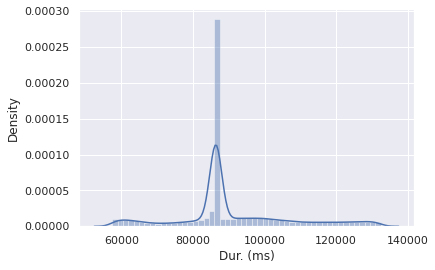

In [ ]:
duration=df['Dur. (ms)']

x= duration

x = x[x.between(x.quantile(.25), x.quantile(.75))] 



g= sns.distplot(x)

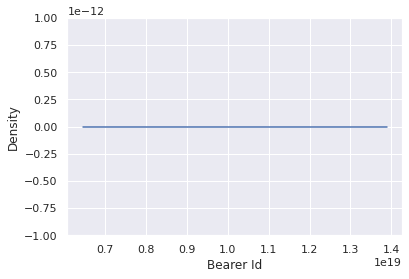

In [ ]:
number_of_xDR_sessions=df['number_of_xDR_sessions']

x= number_of_xDR_sessions

x = x[x.between(x.quantile(.25), x.quantile(.75))] 



g= sns.distplot(x)

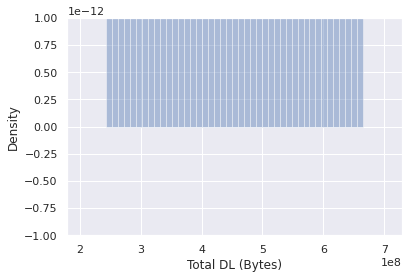

In [ ]:
Total_Dl=df['Total DL (Bytes)']

x= Total_Dl

x = x[x.between(x.quantile(.25), x.quantile(.75))] 



g= sns.distplot(x)

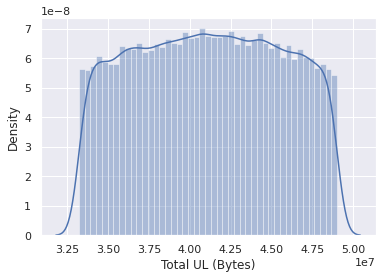

In [ ]:
Total_Ul=df['Total UL (Bytes)']

x= Total_Ul

x = x[x.between(x.quantile(.25), x.quantile(.75))] 



g= sns.distplot(x)

**Bivariate Analysis** – explore the relationship between each application & the
total DL+UL data using appropriate methods and interpret your findings.

The longer the bar for a certain color the pronounced its effect on the Total.

[Text(0, 0.5, 'Total(UL+DL)'),
 Text(0.5, 0, 'Applications'),
 Text(0.5, 1.0, 'Bar plot of Applications')]

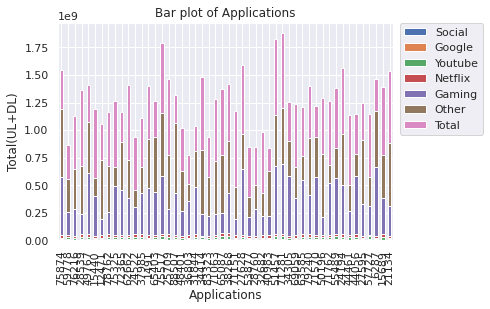

In [ ]:
lp=regression.sample(50).plot.bar(stacked=True)
lp.legend(bbox_to_anchor=(1.02, 1),
          loc=2, 
          borderaxespad=0.0);
lp.set(title='Bar plot of Applications', xlabel='Applications', ylabel='Total(UL+DL)')

**Variable transformations** – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile

In [ ]:
task_1_1

task_1_1['Decile_rank'] = pd.qcut(task_1_1['Total_xDR'], 10, duplicates='drop' , labels = False)


task_1_2 = task_1_1.groupby('Decile_rank').agg(Total_data=('total_data_volume_(in Bytes)', 'sum'))
task_1_2.head()

,Total_data
Decile_rank,
0,5.439277e+12
1,6.109410e+12
2,6.536402e+12
3,6.034241e+12
4,5.143732e+12


In [ ]:
task_1_1

task_1_1['Decile_rank'] = pd.qcut(task_1_1['Total_xDR'], 10, duplicates='drop' , labels = False)


task_1_2 = task_1_1.groupby('Decile_rank').agg(Total_data=('total_data_volume_(in Bytes)', 'sum'))
task_1_2.head()

**Correlation Analysis** – compute a correlation matrix for the following variables
and interpret your findings: Social Media data, Google data, Email data,
Youtube data, Netflix data, Gaming data, Other data


Correlation Analysis for the cleaned data points is computed here.Also it is here shown that some variables are more related than other

           Social    Google   Youtube   Netflix    Gaming     Other
Social   1.000000  0.000749  0.001472 -0.000958  0.001406  0.003856
Google   0.000749  1.000000  0.002619 -0.001171  0.005089 -0.001475
Youtube  0.001472  0.002619  1.000000 -0.001524  0.007751  0.004219
Netflix -0.000958 -0.001171 -0.001524  1.000000  0.001267 -0.001195
Gaming   0.001406  0.005089  0.007751  0.001267  1.000000 -0.000119
Other    0.003856 -0.001475  0.004219 -0.001195 -0.000119  1.000000


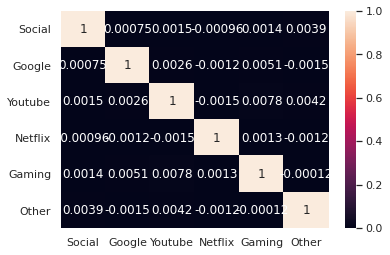

In [ ]:
del regression['Total']
corrMatrix = regression.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)

**Dimensionality Reduction**
We can select some variables that we think can represent the entire data to draw some conclusion about the given data.
we decide on the dimensions we select.
For example by using total upload and total download we can draw some conclusion.
The Dimensionality reduction can dramatically impact the performance of machine learning algorithms fit on data with many input features, generally referred to as the “***curse of dimensionality***.”